https://medium.com/analytics-vidhya/coronavirus-covid-19-genome-analysis-using-biopython-8b8cb1f4a041

In [1]:
!pip install Squiggle

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/google_api_core-1.16.0-py3.8-nspkg.pth:

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/homebrew.pth:

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/homebrew.pth:

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/homebrew.pth:

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/homebrew.pth:

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/homebrew.pth:

  Traceback (most recent call last):
    File "/Users/patsnap/anaconda2/lib/python3.7/site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap_external>", line 1280, in find_spec
    File "<frozen importlib._bootstrap_external>", line 1252, in _get_spec
    File "<frozen importlib._bootstrap_external>", line 1383, in find_spec
 

  Created wheel for pyfaidx: filename=pyfaidx-0.5.9.1-py3-none-any.whl size=25119 sha256=009c7d906736b1ddff7fb6d2fd3bbe94ef97d038ac3f62a2640fc56cfd0a575e
  Stored in directory: /Users/patsnap/Library/Caches/pip/wheels/d8/2b/eb/61b2b24f40d3d68f5a0ec6883aea7e0a6bbc4d4db0707fe2d3
Successfully built pyfaidx
You should consider upgrading via the '/Users/patsnap/anaconda2/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

/Users/patsnap/anaconda2/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from Bio import SeqIO
for sequence in SeqIO.parse('/Users/patsnap/Desktop/Neo4J_and_other_codes/Bioinformatics/datasets-533438-976277-MN908947.fna', "fasta"):
    print(sequence.seq)
    print(len(sequence),'nucleotides')

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [6]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
DNAsequence = SeqIO.read('/Users/patsnap/Desktop/Neo4J_and_other_codes/Bioinformatics/datasets-533438-976277-MN908947.fna', "fasta")

In [7]:
DNAsequence

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet()), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [8]:
DNA = DNAsequence.seq
#Convert DNA into mRNA Sequence
mRNA = DNA.transcribe() #Transcribe a DNA sequence into RNA.
print(mRNA)
print('Size : ',len(mRNA))

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUGGUACACGGAACGUUCU

In [9]:
Amino_Acid = mRNA.translate(table=1, cds=False)
print('Amino Acid', Amino_Acid)
print("Length of Protein:",len(Amino_Acid))
print("Length of Original mRNA:",len(mRNA))

Amino Acid IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*FR*VE

/Users/patsnap/anaconda2/lib/python3.7/site-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [10]:
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

Let’s now identify all the Proteins (chains of amino acids), basically separating at the stop codon, marked by *. Then let’s remove any sequence less than 20 amino acids long, as this is the smallest known functional protein (if curious).

In [24]:
#Identify all the Proteins (chains of amino acids)
Proteins = Amino_Acid.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()
print('Total proteins:', len(df))
def conv(item):
    return len(item)
def to_str(item):
    return str(item)
df['sequence_str'] = df[0].apply(to_str)
df['length'] = df[0].apply(conv)
df.rename(columns={0: "sequence"}, inplace=True)
df.head()
# Take only longer than 20
functional_proteins = df.loc[df['length'] >= 20]
print('Total functional proteins:', len(functional_proteins))
functional_proteins.describe()

Total proteins: 775
Total functional proteins: 80


,length
count,80.000000
mean,67.262500
std,299.955767
min,20.000000
25%,22.000000
50%,25.000000
75%,36.000000
max,2701.000000


Available Tools in ProtParam:
1. count_amino_acids: Simply count the number times an amino acid is repeated in the protein sequence.
2. get_amino_acids_percent: The same as only returns the number in the percentage of the entire sequence.
3. molecular_weight: Calculates the molecular weight of a protein.
4. aromaticity: Calculates the aromaticity value of a protein according to Lobry & Gautier (1994, Nucleic Acids Res., 22, 3174-3180).
5. flexibility: Implementation of the flexibility method of Vihinen et al. (1994, Proteins, 19, 141-149).
6. isoelectric_point: This method uses the module IsoelectricPoint to calculate the pI of a protein.
7. secondary_structure_fraction: This method returns a list of the fraction of amino acids that tend to be in helix, turn, or sheet.
8. Amino acids in Helix: V, I, Y, F, W, L.
9. Amino acids in Turn: N, P, G, S.
10. Amino acids in Sheet: E, M, A, L.

In [25]:
len(Proteins)

775

In [30]:
from __future__ import division
poi_list = []
MW_list = []
from Bio.SeqUtils import ProtParam
for record in Proteins:
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    print("Protein of Interest = ", POI)
    print("Amino acids percent =    ",str(X.get_amino_acids_percent()))
    print("Molecular weight = ", MW_list)
    print("Aromaticity = ", X.aromaticity())
    print("Flexibility = ", X.flexibility())
    print("Isoelectric point = ", X.isoelectric_point())
    print("Secondary structure fraction = ",   X.secondary_structure_fraction())



Protein of Interest =  {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 1, 'H': 0, 'I': 1, 'K': 1, 'L': 2, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 1, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 1}
Amino acids percent =     {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.125, 'H': 0.0, 'I': 0.125, 'K': 0.125, 'L': 0.25, 'M': 0.0, 'N': 0.0, 'P': 0.125, 'Q': 0.0, 'R': 0.125, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.125}
Molecular weight =  [959.1858]
Aromaticity =  0.125
Flexibility =  []
Isoelectric point =  9.994291877746583
Secondary structure fraction =  (0.5, 0.25, 0.25)


Protein of Interest =  {'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 1, 'K': 0, 'L': 2, 'M': 0, 'N': 1, 'P': 0, 'Q': 2, 'R': 1, 'S': 3, 'T': 1, 'V': 1, 'W': 0, 'Y': 0}
Amino acids percent =     {'A': 0.0, 'C': 0.07692307692307693, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.07692307692307693, 'K': 0.0, 'L': 0.15384615384615385, 'M': 0.0, 'N': 0.07692307692307693, 'P': 0.0, 'Q': 0.1

ZeroDivisionError: float division by zero

In [31]:
len(poi_list)

15

<BarContainer object of 20 artists>

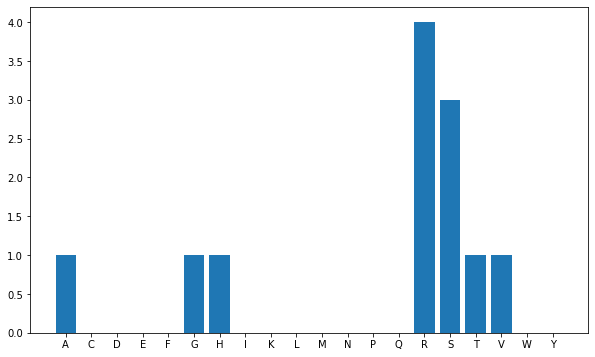

In [28]:
MoW = pd.DataFrame(data = MW_list,columns = ["Molecular Weights"] )
#plot POI
poi_list = poi_list[10]
plt.figure(figsize=(10,6));
plt.bar(poi_list.keys(), list(poi_list.values()), align='center')

In [43]:
#Comparing Human Coronavirus RNA
from Bio import pairwise2
SARS = SeqIO.read("/Users/patsnap/Desktop/Neo4J_and_other_codes/Bioinformatics/COVID-19-coronavirus/sars.fasta", "fasta")
MERS = SeqIO.read("/Users/patsnap/Desktop/Neo4J_and_other_codes/Bioinformatics/COVID-19-coronavirus/mers.fasta", "fasta")
COV2 = SeqIO.read("/Users/patsnap/Desktop/Neo4J_and_other_codes/Bioinformatics/COVID-19-coronavirus/cov2.fasta", "fasta")

In [44]:
#Execute on terminal
!Squiggle /Users/patsnap/Desktop/Neo4J_and_other_codes/Bioinformatics/COVID-19-coronavirus/sars.fasta /Users/patsnap/Desktop/Neo4J_and_other_codes/Bioinformatics/COVID-19-coronavirus/mers.fasta /Users/patsnap/Desktop/Neo4J_and_other_codes/Bioinformatics/COVID-19-coronavirus/cov2.fasta --method=gates --separate

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/google_api_core-1.16.0-py3.8-nspkg.pth:

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/homebrew.pth:

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/homebrew.pth:

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/homebrew.pth:

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/homebrew.pth:

Error processing line 1 of /Users/patsnap/anaconda2/lib/python3.7/site-packages/homebrew.pth:

  Traceback (most recent call last):
    File "/Users/patsnap/anaconda2/lib/python3.7/site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap_external>", line 1280, in find_spec
    File "<frozen importlib._bootstrap_external>", line 1252, in _get_spec
    File "<frozen importlib._bootstrap_external>", line 1383, in find_spec
 

In [45]:
# Alignments using pairwise2 alghoritm
SARS_COV = pairwise2.align.globalxx(SARS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('SARS/COV Similarity (%):', SARS_COV / len(SARS.seq) * 100)
MERS_COV = pairwise2.align.globalxx(MERS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('MERS/COV Similarity (%):', MERS_COV / len(MERS.seq) * 100)
MERS_SARS = pairwise2.align.globalxx(MERS.seq, SARS.seq, one_alignment_only=True, score_only=True)
print('MERS/SARS Similarity (%):', MERS_SARS / len(SARS.seq) * 100)

SARS/COV Similarity (%): 83.33837518066619
MERS/COV Similarity (%): 69.39141405757164
MERS/SARS Similarity (%): 69.93714496991697


<BarContainer object of 3 artists>

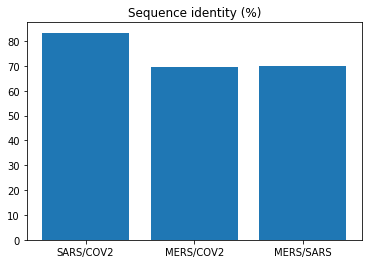

In [46]:
# Plot the data
X = ['SARS/COV2', 'MERS/COV2', 'MERS/SARS']
Y = [SARS_COV/ len(SARS.seq) * 100, MERS_COV/ len(MERS.seq)*100, MERS_SARS/len(SARS.seq)*100]
plt.title('Sequence identity (%)')
plt.bar(X,Y)